# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_key
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [4]:
## Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

#Set up response lists
cloudiness = []
date = []
humidity = []
max_temp = []
wind_speed = []
city_id = []
latitude = []
longitude = []
found_city = []

print("Beginning Data Retrieval")
print("---------------------------")
#Find the weather for each city
for city in cities:
    # Get weather data, skip if the city name does not exist
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all']) 
        humidity.append(response['main']['humidity'])       
        max_temp.append(response['main']['temp_max'])        
        wind_speed.append(response['wind']['speed'])     
        city_id.append(response['id'])      
        date.append(response['dt']) 
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        found_city.append(response['name'])
    except(KeyError,IndexError):
        print(f"missing city", city, "skip")
    print("processing | ", city)   
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")
    
    
    

Beginning Data Retrieval
---------------------------
processing |  kapaa
processing |  solhan
processing |  mataura
processing |  georgetown
processing |  chalus
missing city taolanaro skip
processing |  taolanaro
processing |  tuatapere
processing |  hermanus
processing |  arraial do cabo
processing |  thompson
processing |  broome
processing |  rikitea
processing |  suicheng
processing |  nizwa
processing |  bathsheba
processing |  samarai
processing |  igrim
processing |  avarua
missing city barentsburg skip
processing |  barentsburg
processing |  flinders
processing |  sangar
processing |  elizabeth city
processing |  pevek
processing |  hasaki
processing |  punta arenas
processing |  port alfred
processing |  lebu
processing |  ushuaia
processing |  sargatskoye
processing |  orange cove
processing |  new norfolk
processing |  dikson
processing |  busselton
processing |  port hardy
processing |  panaba
processing |  caborca
missing city vaitupu skip
processing |  vaitupu
missing ci

processing |  revda
processing |  praia da vitoria
processing |  adzope
processing |  saryg-sep
processing |  constantine
processing |  virarajendrapet
processing |  okhotsk
missing city tilsonburg skip
processing |  tilsonburg
processing |  felanitx
processing |  mehran
processing |  pringsewu
processing |  chicama
processing |  marovoay
missing city paradwip skip
processing |  paradwip
processing |  damietta
processing |  kampong cham
processing |  kysyl-syr
processing |  kahului
processing |  sobolevo
processing |  juneau
processing |  dingle
processing |  bela vista do paraiso
processing |  berlevag
processing |  limon
processing |  pochutla
processing |  kaniama
processing |  kapit
processing |  yanam
missing city rudbar skip
processing |  rudbar
processing |  alofi
processing |  turangi
processing |  rincon
processing |  makakilo city
processing |  san andres
processing |  aguas belas
processing |  muli
missing city viligili skip
processing |  viligili
processing |  palenque
miss

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Build a dataframe of the data and display
city_file_df =pd.DataFrame({"City":found_city, "City ID": city_id,"Date":date, "Max Temperature":max_temp, 
             "Cloudiness":cloudiness, "Humidity":humidity, "Wind Speed":wind_speed, 
            "Latitude":latitude, "Longitude":longitude})
city_file_df.to_csv("city.csv")
city_file_df.head()

,City,City ID,Date,Max Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude
0,Kapaa,5848280,1553459300,24.00,90,78,5.10,22.08,-159.32
1,Solhan,300377,1553457600,1.11,90,89,2.10,38.97,41.05
2,Mataura,6201424,1553459407,16.11,36,92,4.05,-46.19,168.86
3,Georgetown,3378644,1553457600,30.00,40,66,6.20,6.80,-58.16
4,Chalus,139223,1553457600,12.00,75,93,5.10,36.66,51.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
type(city_file_df["Date"][0])
date = time.gmtime(city_file_df["Date"][0])
time_string = time.strftime("%b %d %Y", date)
print (time_string)

Mar 24 2019


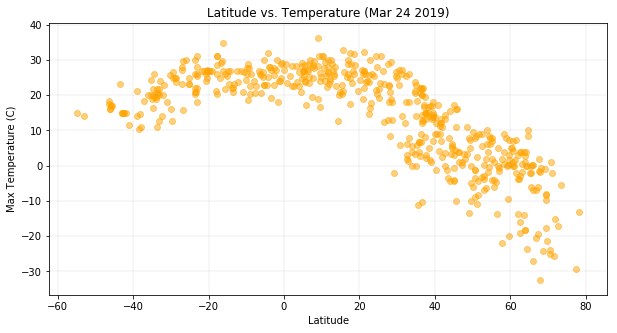

<Figure size 432x288 with 0 Axes>

In [18]:
#Scatterplot of Latitude vs Temp
y = city_file_df['Max Temperature']
x = city_file_df['Latitude']
fig, ax = plt.subplots(figsize=(10,5))
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="orange")

#add legend
plt.title(f"Latitude vs. Temperature ({time_string})")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#display plot and save as a png
plt.show()
plt.savefig('Lat_vs_temp.png')

#### Latitude vs. Humidity Plot

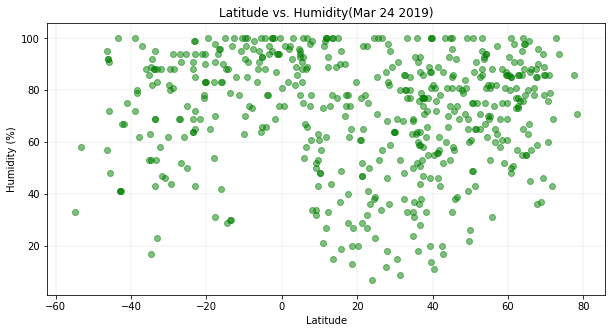

<Figure size 432x288 with 0 Axes>

In [17]:
#Scatterplot of Latitude vs Humidity
y = city_file_df['Humidity']
x = city_file_df['Latitude']
fig, ax = plt.subplots(figsize=(10,5))
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50,color="green")

#add legend
plt.title(f"Latitude vs. Humidity({time_string})")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) 

#Display plot and save as a png file
plt.show()
plt.savefig('Lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

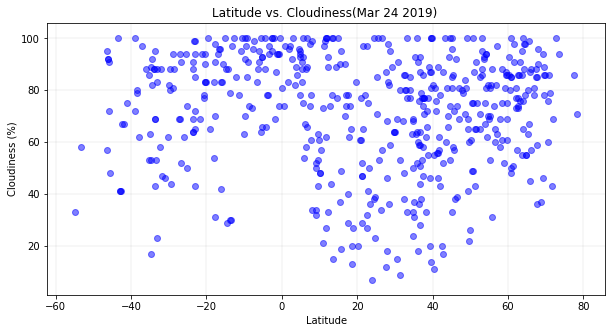

<Figure size 432x288 with 0 Axes>

In [24]:
#Scatterplot of Latitude vs Cloudiness
y = city_file_df['Humidity']
x = city_file_df['Latitude']
fig, ax = plt.subplots(figsize=(10,5))
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="blue")

#add legend
plt.title(f"Latitude vs. Cloudiness({time_string}) ")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) 

#Display plot and show as a png file
plt.show()
plt.savefig('Lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

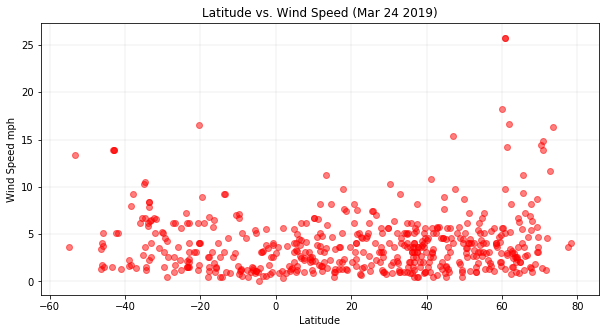

<Figure size 432x288 with 0 Axes>

In [21]:
#Scatterplot of Latitude vs Wind Speed
x = city_file_df['Latitude']
y = city_file_df['Wind Speed']
fig, ax = plt.subplots(figsize=(10,5))

for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="red")

#add titles and labels
plt.title(f"Latitude vs. Wind Speed ({time_string})")
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) 

#plot and save as a png
plt.show()
plt.savefig('Lat_vs_windspeed.png')